In [1]:
setwd('/data/import/project1/momo-6.12.0.199/runtime/PIPELINE/taxonkit1/a.ji/data2/')

###  valcano

In [2]:
diff = read.table('./sample74.pro.txt',header =T,sep = '\t',fill =NA)

In [3]:
dim(diff)

[1] 18264    11

In [4]:
diff = diff[!duplicated(diff$GeneName),]

In [5]:
head(diff,3)

,GeneName,Biotype,Gene,CI_normalize,CRTL_normalize,FoldChange,Log2FoldChange,pval,padj,Up.Down,Significant
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,TSPAN6,protein_coding,ENSG00000000003,3.922491,4.90077945,0.8003811,-0.3212410,0.286507903,0.74424720,down,no
2,TNMD,protein_coding,ENSG00000000005,0.000000,0.03036792,NA,NA,NA,NA,,
3,DPM1,protein_coding,ENSG00000000419,349.041250,269.58626190,1.2947294,0.3726506,0.002837602,0.07255005,up,no


In [6]:
padj = 0.05
foldChange = 0.5

In [7]:
diff$group = as.factor(ifelse(diff$padj	 < padj & abs(diff$Log2FoldChange	) > foldChange, 
                                 ifelse(diff$Log2FoldChange	> foldChange ,'Up','Down'),'NoSignifi'))
table(diff$group)


     Down NoSignifi        Up 
      458     17381        67 

### fgsea

In [8]:
head(diff,2)

,GeneName,Biotype,Gene,CI_normalize,CRTL_normalize,FoldChange,Log2FoldChange,pval,padj,Up.Down,Significant,group
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<fct>
1,TSPAN6,protein_coding,ENSG00000000003,3.922491,4.90077945,0.8003811,-0.321241,0.2865079,0.7442472,down,no,NoSignifi
2,TNMD,protein_coding,ENSG00000000005,0.000000,0.03036792,NA,NA,NA,NA,,,NA


In [9]:
library(fgsea)
library(tidyverse)
library(org.Hs.eg.db)
library(msigdbr)
library(clusterProfiler)

Gene = diff[,c('GeneName','Log2FoldChange')]

entrez_id<-bitr(geneID = Gene$GeneName,fromType = "SYMBOL",toType = "ENTREZID",OrgDb = org.Hs.eg.db)
colnames(entrez_id)<-c("GeneName","ENTREZID")

entrez_gene<-merge(entrez_id,Gene,by="GeneName") %>% na.omit()

entrez_gene <- entrez_gene[is.finite(entrez_gene$Log2FoldChange),]

rank_df<-entrez_gene$Log2FoldChange
names(rank_df)<-entrez_gene$GeneName
rank_df<-sort(rank_df,decreasing = TRUE)

geneset <- qusage::read.gmt("/data/import/project1/kegg.gmt")
fgseaRes <- fgsea(pathways = geneset, 
                  stats = rank_df,
                  minSize=5,
                  maxSize=500,
                  nperm=100000)
head(fgseaRes[order(pval), ])
df_fgseaRes = data.frame(lapply(fgseaRes, as.character), stringsAsFactors=FALSE)
write.table(df_fgseaRes,file = "./fig.re/sample74.fgseaRes.txt",sep="\t",quote = FALSE,row.names = FALSE)

Warning message:
"package 'fgsea' was built under R version 4.2.3"
Warning message in system("timedatectl", intern = TRUE):
"running command 'timedatectl' had status 1"
-- Attaching packages --------------------------------------- tidyverse 1.3.2 --
v ggplot2 3.5.1     v purrr   1.0.2
v tibble  3.2.1     v dplyr   1.1.4
v tidyr   1.3.1     v stringr 1.5.1
v readr   2.1.5     v forcats 1.0.0
Warning message:
"package 'tibble' was built under R version 4.2.3"
Warning message:
"package 'forcats' was built under R version 4.2.3"
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::ident()  masks dbplyr::ident()
x dplyr::lag()    masks stats::lag()
x dplyr::sql()    masks dbplyr::sql()
Loading required package: AnnotationDbi

Warning message:
"package 'AnnotationDbi' was built under R version 4.2.2"
Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: 'BiocGenerics'


The fo

pathway,pval,padj,ES,NES,nMoreExtreme,size,leadingEdge
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<list>
Cytoskeleton in muscle cells,2.224397e-05,0.007585194,-0.4898121,-1.814714,1,205,"FBN3, MY...."
Olfactory transduction,3.043677e-04,0.041423712,0.3864392,1.701229,3,154,"OR1E1, O...."
Herpes simplex virus 1 infection,3.644315e-04,0.041423712,0.3893624,1.938906,0,478,"ZNF625, ...."
Platelet activation,5.365702e-04,0.045742613,-0.4876464,-1.702160,44,116,"ITGA2B, ...."
ABC transporters,2.629831e-03,0.179354471,-0.5762207,-1.726988,193,43,"ABCC8, A...."
Neuroactive ligand-receptor interaction,5.268658e-03,0.299435397,-0.3797987,-1.429813,483,248,"QRFPR, G...."


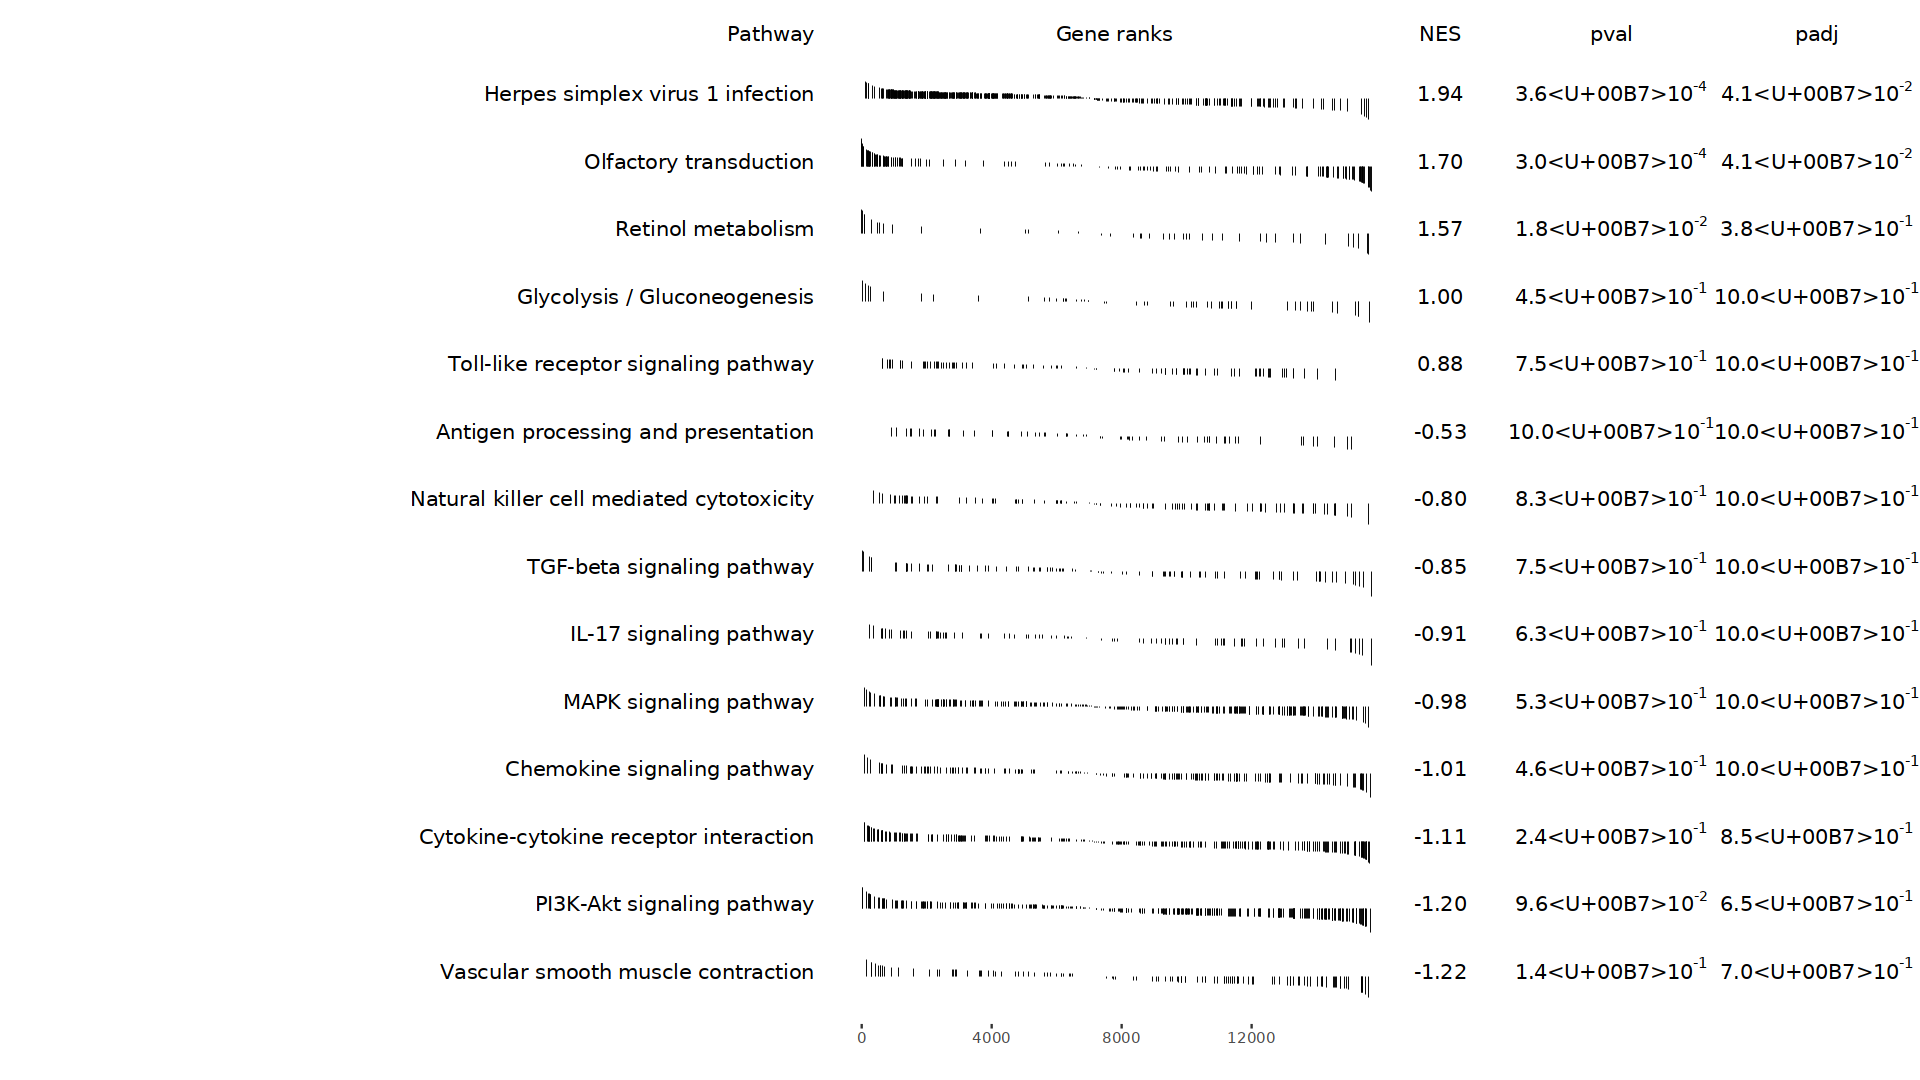

In [48]:
sig <- fgseaRes
sig <- sig[order(sig$NES,decreasing = T),]

options(repr.plot.width = 16,repr.plot.height = 9)

path = c('Glycolysis / Gluconeogenesis',
'Retinol metabolism',
'Toll-like receptor signaling pathway',
'Olfactory transduction',
'Herpes simplex virus 1 infection',
'MAPK signaling pathway',
'TGF-beta signaling pathway',
'PI3K-Akt signaling pathway',
'Cytokine-cytokine receptor interaction',
'Natural killer cell mediated cytotoxicity',
'Antigen processing and presentation',
'IL-17 signaling pathway',
'Chemokine signaling pathway',
'Vascular smooth muscle contraction'
)


sig1 = sig %>% filter(pathway %in% path)



In [50]:
pdf('./fig.re/sample.fgsea74.pdf',width = 16,height = 6)
plotGseaTable(geneset[sig1$pathway], rank_df,  fgseaRes, gseaParam=0.5)
dev.off()

png 
  2

In [14]:
dim(fgseaRes)

[1] 341   8

#### GSEA

In [15]:
head(diff,2)

,GeneName,Biotype,Gene,CI_normalize,CRTL_normalize,FoldChange,Log2FoldChange,pval,padj,Up.Down,Significant,group
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<fct>
1,TSPAN6,protein_coding,ENSG00000000003,3.922491,4.90077945,0.8003811,-0.321241,0.2865079,0.7442472,down,no,NoSignifi
2,TNMD,protein_coding,ENSG00000000005,0.000000,0.03036792,NA,NA,NA,NA,,,NA


In [16]:
diff <- diff[!is.infinite(diff$Log2FoldChange),]

diffgene = diff 

library(clusterProfiler)
library(enrichplot)
library(org.Mm.eg.db)

diffgene$gene <-diffgene$GeneName
ids=bitr(diffgene$gene,'SYMBOL','ENTREZID','org.Hs.eg.db')

diffgene=merge(diffgene,ids,by.x='gene',by.y='SYMBOL')

head(diffgene)

cluster3.markers = diffgene

cluster3.markers <- cluster3.markers[order(cluster3.markers$Log2FoldChange,decreasing = T),]

cluster3.markers_list <- as.numeric(cluster3.markers$Log2FoldChange)
names(cluster3.markers_list) <- cluster3.markers$ENTREZID
head(cluster3.markers_list)

cluster3_de <- names(cluster3.markers_list)[abs(cluster3.markers_list) > 0.15]
head(cluster3_de)

length(cluster3_de)

cluster3_gsekg <- gseKEGG(cluster3.markers_list,organism = "hsa",pvalueCutoff = 1)
cluster3_gsekg_arrange <- arrange(cluster3_gsekg,desc(abs(NES)))

head(cluster3_gsekg_arrange,2)

grep('Na',cluster3_gsekg_arrange@result$Description)

cluster3_gsekg_arrange@result[251,]

Warning message:
"package 'enrichplot' was built under R version 4.2.2"


'select()' returned 1:many mapping between keys and columns

Warning message in bitr(diffgene$gene, "SYMBOL", "ENTREZID", "org.Hs.eg.db"):
"9.8% of input gene IDs are fail to map..."


,gene,GeneName,Biotype,Gene,CI_normalize,CRTL_normalize,FoldChange,Log2FoldChange,pval,padj,Up.Down,Significant,group,ENTREZID
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<fct>,<chr>
1,A1BG,A1BG,protein_coding,ENSG00000121410,16.1211406,15.96459643,1.0098057,0.014077740,0.9065345,1.0000000,up,no,NoSignifi,1
2,A2M,A2M,protein_coding,ENSG00000175899,13.3429319,13.43445744,0.9931873,-0.009862347,1.0000000,1.0000000,down,no,NoSignifi,2
3,A2ML1,A2ML1,protein_coding,ENSG00000166535,0.3341444,0.73018623,0.4576154,-1.127792591,0.1548259,0.5755043,down,no,NoSignifi,144568
4,A3GALT2,A3GALT2,protein_coding,ENSG00000184389,21.2075603,23.38547784,0.9068688,-0.141034243,0.4392737,0.8477251,down,no,NoSignifi,127550
5,A4GALT,A4GALT,protein_coding,ENSG00000128274,6.7944327,4.54004550,1.4965561,0.581646335,0.4429338,0.8495720,up,no,NoSignifi,53947
6,A4GNT,A4GNT,protein_coding,ENSG00000118017,0.0365000,0.07525038,0.4850474,-1.043802444,0.7550651,1.0000000,down,no,NoSignifi,51146


8387   284383   389941     9699   145226     2705 
4.214524 3.634774 3.263879 3.211283 3.115895 3.098936

[1] "8387"   "284383" "389941" "9699"   "145226" "2705"

[1] 10812

Reading KEGG annotation online: "https://rest.kegg.jp/link/hsa/pathway"...

Reading KEGG annotation online: "https://rest.kegg.jp/list/pathway/hsa"...

Warning message in sort(x, decreasing = decreasing) == x:
"longer object length is not a multiple of shorter object length"


ERROR: Error in if (!is.sorted(geneList)) stop("geneList should be a decreasing sorted vector..."): missing value where TRUE/FALSE needed


In [ ]:
write.csv(cluster3_gsekg_arrange,file = './fig.re//sample74.KEGG_GSEA.csv')